## IB - Sales Forecasting (ARIMA)

By: Renaud Justin Beaupre

In this notebook, I will be applying the principles behind [Susan Li's Medium article on time series analysis and forecasting](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b) onto IB's sales data from March 2017-2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = pd.read_csv('sales_2017_2019.csv')
data.head()

,day,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
0,2017-03-01,341,12721.0,-398.20,-46.50,12276.30,1349.96,18.59,13644.85
1,2017-03-02,324,11998.0,-359.70,-225.55,11412.75,1018.58,21.15,12452.48
2,2017-03-03,304,11612.0,-392.00,-78.00,11142.00,949.34,37.76,12129.10
3,2017-03-04,298,10485.0,-309.25,0.00,10175.75,975.00,25.64,11176.39
4,2017-03-05,343,13220.0,-344.25,-237.00,12638.75,1375.79,23.68,14038.22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 9 columns):
day            761 non-null object
orders         761 non-null int64
gross_sales    761 non-null float64
discounts      761 non-null float64
returns        761 non-null float64
net_sales      761 non-null float64
shipping       761 non-null float64
taxes          761 non-null float64
total_sales    761 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.6+ KB


In [4]:
data.describe()

,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,699.975033,24453.899106,-2703.575480,-554.610999,21195.712628,2622.170105,538.671892,24356.554625
std,454.354129,16715.811342,5293.159431,613.733509,11709.265702,1651.187180,593.702453,13788.007180
min,128.000000,4862.000000,-72154.630000,-4412.390000,4680.500000,524.000000,11.410000,5271.310000
25%,370.000000,13824.000000,-2322.700000,-857.850000,13043.800000,1445.040000,115.420000,14678.010000
50%,665.000000,22447.400000,-1282.250000,-333.450000,20345.980000,2446.000000,205.290000,23386.280000
75%,858.000000,29132.200000,-526.500000,-82.400000,25982.910000,3241.090000,896.550000,30070.310000
max,5058.000000,207707.300000,-113.950000,0.000000,142878.030000,18600.000000,5244.500000,166475.470000


In [5]:
data = data.drop(columns=['orders','gross_sales','discounts','returns','net_sales','shipping','taxes'])
data.head() #Drop the columns we don't need

,day,total_sales
0,2017-03-01,13644.85
1,2017-03-02,12452.48
2,2017-03-03,12129.10
3,2017-03-04,11176.39
4,2017-03-05,14038.22


In [6]:
data = data.set_index('day')
data.index

Index(['2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04', '2017-03-05',
       '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
       ...
       '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
       '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30', '2019-03-31'],
      dtype='object', name='day', length=761)

In [7]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04',
               '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
               '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
               '2019-03-30', '2019-03-31'],
              dtype='datetime64[ns]', name='day', length=761, freq=None)

In [8]:
data = data['total_sales'].resample('W-FRI').mean()
data['2017': ] #Our financial reports are done on a weekly basis from Friday through to the following Thursday

day
2017-03-03    12742.143333
2017-03-10    14276.168571
2017-03-17    11816.175714
2017-03-24    13585.700000
2017-03-31    14672.065714
2017-04-07    14214.415714
2017-04-14    12775.334286
2017-04-21    14149.570000
2017-04-28    14394.661429
2017-05-05    13522.551429
2017-05-12    11047.037143
2017-05-19    11176.445714
2017-05-26    14271.832857
2017-06-02    11642.095714
2017-06-09    11346.868571
2017-06-16    13753.482857
2017-06-23    15161.752857
2017-06-30    16018.215714
2017-07-07    15875.020000
2017-07-14    20114.844286
2017-07-21    16712.148571
2017-07-28    16234.847143
2017-08-04    15915.182857
2017-08-11    13894.092857
2017-08-18    15632.645714
2017-08-25    17540.951429
2017-09-01    14773.668571
2017-09-08    16418.821429
2017-09-15    13889.258571
2017-09-22    17453.070000
                  ...     
2018-09-14    29201.155714
2018-09-21    27808.181429
2018-09-28    36479.754286
2018-10-05    24608.595714
2018-10-12    24876.375714
2018-10-19    27614.3857

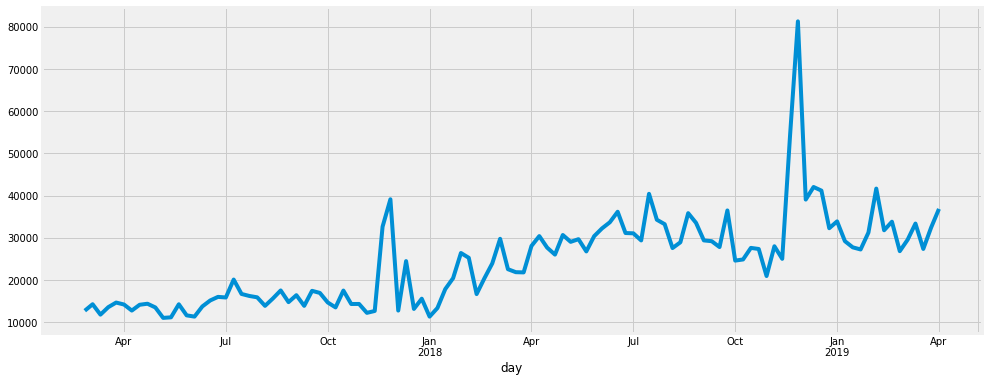

In [9]:
data.plot(figsize=(15, 6))
plt.show()

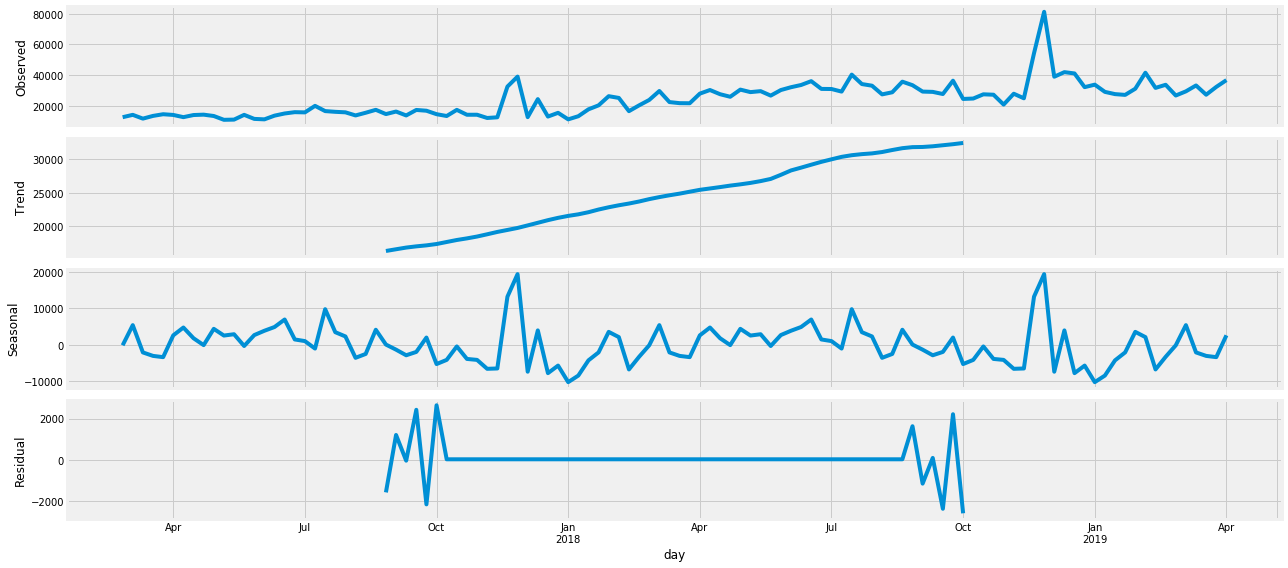

In [10]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] #Iteratively generate all possible combinations for ARIMA configuration parameters

In [12]:
import warnings
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue #This function is a grid search to find the optimal configuration parameters for our ARIMA model

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2533.2045909840363
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2220.915845080853
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2083.088252183491
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1822.9968493370725
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2104.870267347058
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2065.218093330659
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1830.8876351894075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1812.5935013474389
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2443.143326163593
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2159.89820241904
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2036.639577864278
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1775.2160433607776
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2194.7716989344594
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2149.561226694822
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1809.9731061670288
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1771.3166340856235
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2241.755354790564
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2008.7716290340181
AR

In [13]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1]) #From the printout above, ARIMA(1, 1, 1)x(0, 1, 1, 12) had the lowest AIC (1747.55)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4481      0.137      3.273      0.001       0.180       0.716
ma.L1         -0.9587      0.172     -5.562      0.000      -1.297      -0.621
ma.S.L12      -0.8921      0.269     -3.316      0.001      -1.419      -0.365
sigma2      1.215e+08   1.82e-09   6.67e+16      0.000    1.21e+08    1.21e+08


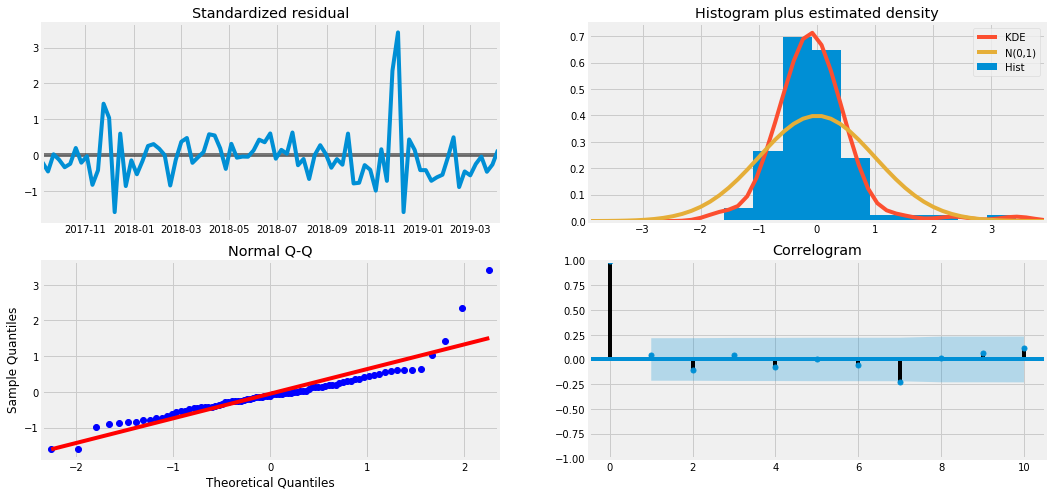

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show() #The residual around Black Friday is incredibly high and it's going to skew the data. 

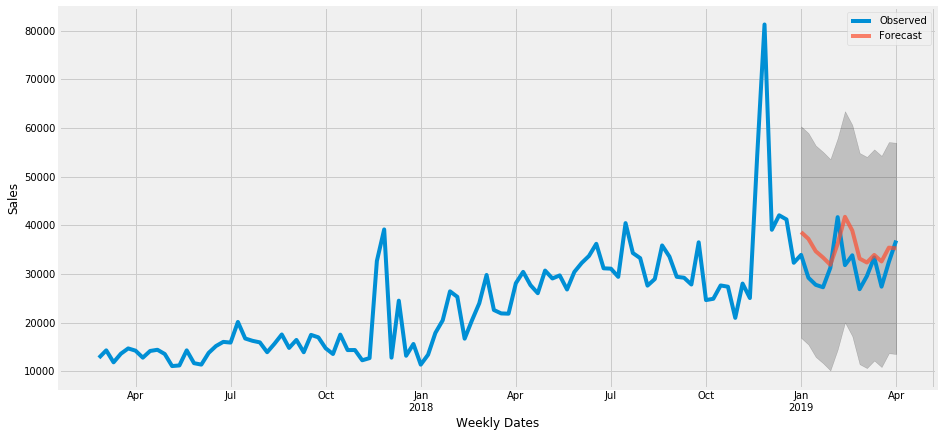

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-04'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2017':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Weekly Dates')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = data['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 29368278.99


In [18]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2))) # RMSE = 5,419.25 on a daily sales range of 5,271.31 - 16,6475.47 

The Root Mean Squared Error of our forecasts is 5419.25


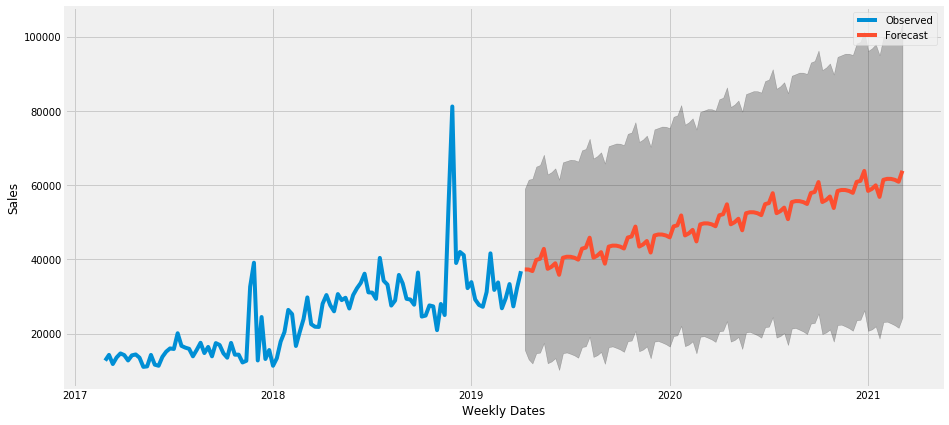

In [19]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Weekly Dates')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [20]:
pred_uc.predicted_mean

2019-04-12    37322.450060
2019-04-19    37292.483733
2019-04-26    36878.235403
2019-05-03    39880.515776
2019-05-10    40184.991613
2019-05-17    42864.695662
2019-05-24    37480.504692
2019-05-31    38032.965820
2019-06-07    38983.200752
2019-06-14    35867.743683
2019-06-21    40467.649696
2019-06-28    40736.449332
2019-07-05    40723.578912
2019-07-12    40472.463776
2019-07-19    39959.115633
2019-07-26    42916.988023
2019-08-02    43201.564034
2019-08-09    45872.350698
2019-08-16    40484.163726
2019-08-23    41034.834190
2019-08-30    41984.266701
2019-09-06    38868.450056
2019-09-13    43468.194938
2019-09-20    43736.922370
2019-09-27    43724.019593
2019-10-04    43472.889958
2019-10-11    42959.535318
2019-10-18    45917.404796
2019-10-25    46201.979503
2019-11-01    48872.765582
                  ...     
2020-08-14    55469.852585
2020-08-21    55738.580012
2020-08-28    55725.677234
2020-09-04    55474.547598
2020-09-11    54961.192957
2020-09-18    57919.062435
2